# BI-PRS: semestrální projekt 2

Cílem druhého semestrálního projektu je prozkoumat závislost konkrétní proměnné na různých regresorech z přiřazeného datasetu.

Náš tým se skládá ze tří lidí: Ruslana Orazbekova (orazbrus), Nelly Shikina (shikinel), Daria Sychova (sychodar). Reprezentatntem v prvním semestrálním projektu je Daria Sychova. Nejprve určíme, který soubor dat a kterou proměnnou budeme v rámci semestrálního projektu analyzovat.

In [1]:
# K = den narození reprezentanta skupiny (1-31)
# L = počet písmen v příjmení reprezentanta
# M = ((K+L)×47)mod11+1

K <- 10
L <- nchar('Sychova')
M <- ((K + L) * 47) %% 11 + 1
print(M)

[1] 8


Máme teda dataset **ex0918**:

> Researchers studied the development of a fly (Drosophila subobscura) that had been accidentally introduced from the Old World into North America around 1980
>
**Vysvětlovaná proměnná:** Ratio
**Popis:** Poměr velikosti křídel ku délce much

## Uloha 1

#### Načtěme knihovny a požadovanou datovou sadu.

In [2]:
library(Sleuth2)
library(mgcv)
library(ggplot2)
library(graphics)

Loading required package: nlme

This is mgcv 1.9-0. For overview type 'help("mgcv-package")'.



In [3]:
data(ex0918)

In [4]:
str(ex0918)

'data.frame':	21 obs. of  8 variables:
 $ Continent: Factor w/ 2 levels "NA","EU": 1 1 1 1 1 1 1 1 1 2 ...
 $ Latitude : num  35.5 37 38.6 40.7 40.9 42.4 45 46.8 48.8 49.8 ...
 $ Females  : num  901 896 906 907 898 893 913 915 927 924 ...
 $ SE.F     : num  2.5 3.5 3 3.5 3.6 3.4 4.3 3.8 2 4.5 ...
 $ Males    : num  797 806 812 807 818 809 810 819 800 823 ...
 $ SE.M     : num  3.8 3 3.2 3.2 2.7 3.3 4.3 3.3 4.9 2.2 ...
 $ Ratio    : num  0.831 0.834 0.836 0.833 0.83 0.828 0.834 0.825 0.832 0.824 ...
 $ SE.R     : num  0.01 0.014 0.012 0.013 0.012 0.015 0.024 0.014 0.009 0.011 ...


#### Data structure
**Continent:** a factor with levels "NA" and "EU"
**Latitude:** latitude (degrees)
**Females:** average wing size (103×log mm) of female flies on log scale
**SE.F:** standard error of wing size (103×log mm) of female flies on log scale
**Males:** average wing size (103×log mm) of male flies on log scale
**SE.M:** standard error of wing size (103×log mm) of male flies on log scale
**Ratio:** average basal length to wing size ratios of female flies
**SE.R:** standard error of average basal length to wing size ratio of female flies

In [5]:
head(ex0918)

,Continent,Latitude,Females,SE.F,Males,SE.M,Ratio,SE.R
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,35.5,901,2.5,797,3.8,0.831,0.010
2,NA,37.0,896,3.5,806,3.0,0.834,0.014
3,NA,38.6,906,3.0,812,3.2,0.836,0.012
4,NA,40.7,907,3.5,807,3.2,0.833,0.013
5,NA,40.9,898,3.6,818,2.7,0.830,0.012
6,NA,42.4,893,3.4,809,3.3,0.828,0.015


In [6]:
summary(ex0918)

 Continent    Latitude       Females         SE.F           Males      
 NA: 9     Min.   :35.5   Min.   :889   Min.   :2.000   Min.   :789.0  
 EU:12     1st Qu.:40.7   1st Qu.:901   1st Qu.:3.200   1st Qu.:807.0  
           Median :45.0   Median :915   Median :3.500   Median :812.0  
           Mean   :44.6   Mean   :914   Mean   :3.652   Mean   :815.1  
           3rd Qu.:48.8   3rd Qu.:926   3rd Qu.:4.300   3rd Qu.:819.0  
           Max.   :56.1   Max.   :944   Max.   :6.100   Max.   :855.0  
      SE.M           Ratio            SE.R        
 Min.   :2.200   Min.   :0.809   Min.   :0.00700  
 1st Qu.:3.100   1st Qu.:0.824   1st Qu.:0.01200  
 Median :3.300   Median :0.826   Median :0.01300  
 Mean   :3.724   Mean   :0.827   Mean   :0.01476  
 3rd Qu.:4.300   3rd Qu.:0.832   3rd Qu.:0.01600  
 Max.   :6.200   Max.   :0.836   Max.   :0.03200  

Vidíme, že údaje pro female a male se významně neliší. Standard error pro female od 2.000 do 6.100 pro male od 2.200 do 6.200. Ověříme přitomnost NaN hodnot:

In [7]:
# Checking if we have NaN values
any_na <- any(is.na(ex0918))
print(any_na)

[1] FALSE


We don't have any NaN values, which is fine. Now let's plot a histogram for (add smth...)

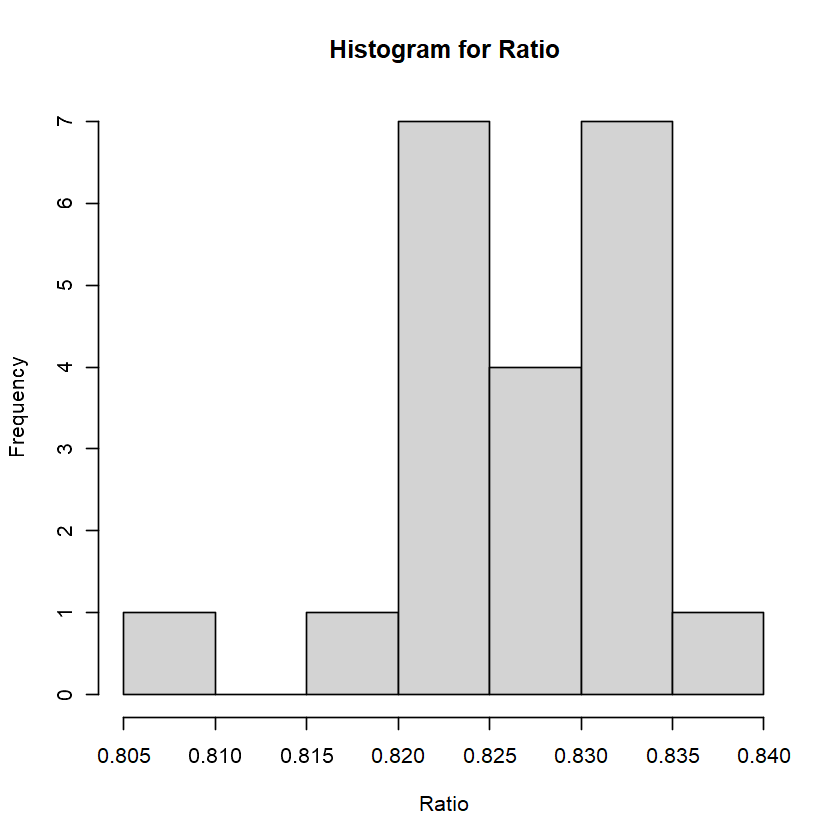

In [8]:
hist(ex0918$Ratio, main="Histogram for Ratio", xlab="Ratio")

Tento histogram zobrazuje rozdělení proměnné 'Ratio'. Většina datových bodů se shromažďuje ve středních hodnotách. Histogram naznačuje, že distribuce proměnné 'Ratio' není rovnoměrná a ukazuje na bimodální nebo jine ne-standardní rozdělení dat.

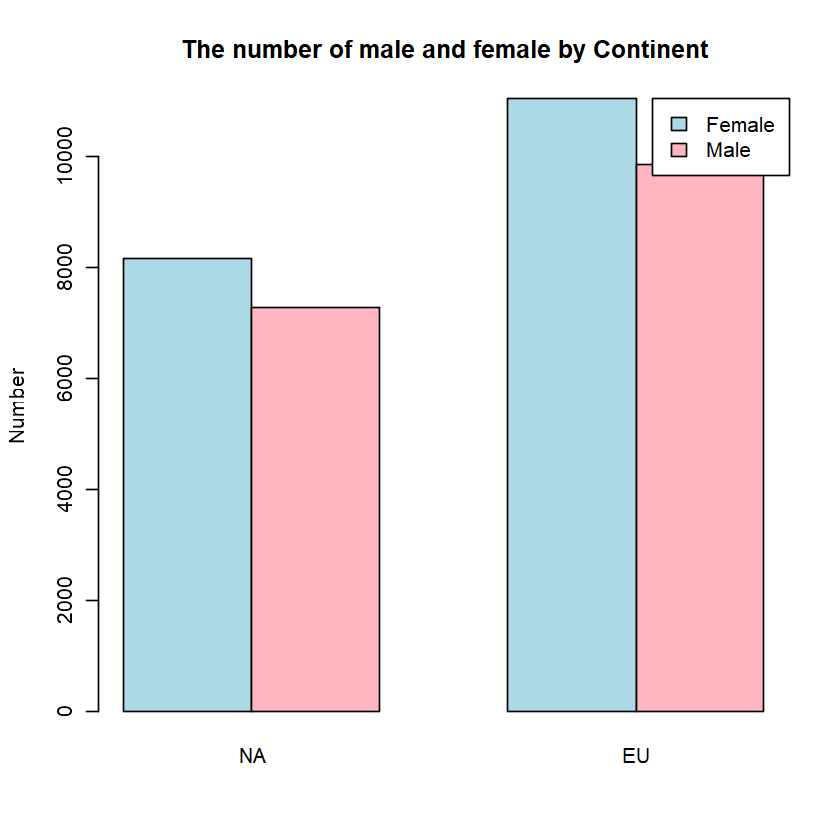

In [9]:
sum_females <- aggregate(Females ~ Continent, data = ex0918, sum)
sum_males <- aggregate(Males ~ Continent, data = ex0918, sum)

# Vytvoření sloupcového grafu
barplot(rbind(sum_females$Females, sum_males$Males), 
        beside = TRUE, 
        col = c("lightblue", "lightpink"),
        names.arg = sum_females$Continent,
        legend.text = c("Female", "Male"),
        args.legend = list(x = "topright"),
        main = "The number of male and female by Continent",
        ylab = "Number")

Na základě tohoto grafu vidíme, že počet samcu mírně převyšuje počet samic na obou kontinentech. Také počet much v Evropě je obecně vyšší než v Severní Americe.

# Uloha 2

#### Zkoumejme závislost vysvětlované proměnné na tomto regresoru.


Call:
lm(formula = SE.R ~ SE.F, data = ex0918)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0070602 -0.0024988 -0.0005501  0.0010938  0.0133473 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 0.002379   0.004037   0.589  0.56263   
SE.F        0.003390   0.001070   3.170  0.00505 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.004671 on 19 degrees of freedom
Multiple R-squared:  0.3459,	Adjusted R-squared:  0.3115 
F-statistic: 10.05 on 1 and 19 DF,  p-value: 0.005045


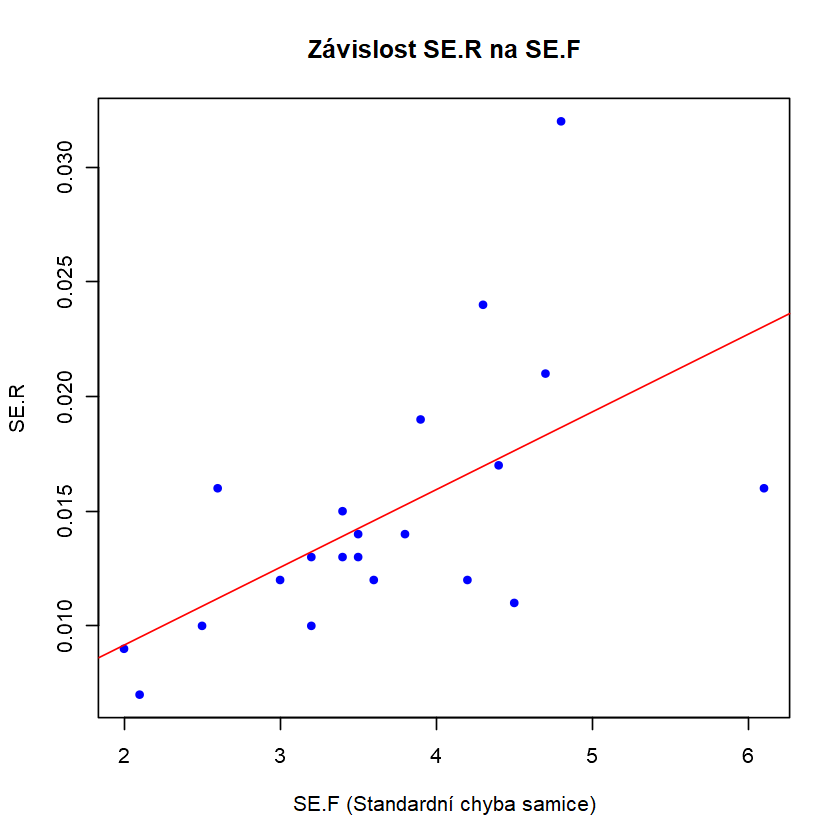

In [10]:
# Lineární regresní model SE.R jako funkce SE.F
model_SE <- lm(SE.R ~ SE.F, data = ex0918)

# Zobrazení výsledků modelu
summary(model_SE)

# Grafické zobrazení modelu s bodovým grafem a regresní linií
plot(ex0918$SE.F, ex0918$SE.R, 
     main = "Závislost SE.R na SE.F", 
     xlab = "SE.F (Standardní chyba samice)", 
     ylab = "SE.R", 
     pch = 20, 
     col = "blue")

# Přidání regresní přímky do grafu
abline(model_SE, col = "red")

Podle výsledků regresní analýzy a grafu můžeme dělat následující závěry:

* Koeficienty modelu: hodnota interceptu je velmi nízká a statisticky nevýznamná s p-hodnotou 0.56263, což naznačuje, že když je SE.F nula, odhadovaná hodnota SE.R je blízká nule. Koeficient pro SE.F je přibližně 0.00339 a je statisticky významný (p-hodnota = 0.00505), což ukazuje, že existuje pozitivní vztah mezi SE.F a SE.R.

* Kvalita modelu: hodnota R-kvadrátu je 0.3459, což značí, že model vysvětluje přibližně 34.59% variability SE.R. Upravený R-kvadrát je nižší, 0.3115, ale stále indikuje, že SE.F má určitý významný vliv na SE.R.

* Vizualizace modelu: graf ukazuje, že s nárůstem SE.F roste i SE.R, což je v souladu s pozitivním koeficientem uvedeným ve výsledcích modelu. Body jsou rozptýleny a regresní čára ukazuje zvyšující se trend.

* Závěr: tento model ukazuje, že standardní chyba pro samice (SE.F) je relevantním prediktorem pro standardní chybu poměru (SE.R). 

# Úloha 3

V této úloze zvolíme jako regresor nějakou kategoriální proměnnou. Vzhledem k povaze poskytnutých proměnných můžeme jako kategoriální regresor zvolit proměnnou **Continent**. Ta rozděluje data do dvou odlišných skupin: "NA" (Severní Amerika) a "EU" (Evropa). Tato proměnná reprezentuje různé geografické oblasti a je rozumné předpokládat, že mouchy z různých kontinentů mohou vykazovat různé charakteristiky z hlediska velikosti nebo poměru křídel.

In [11]:
# Fit the ANOVA model
anova_model <- aov(Ratio ~ Continent, data = ex0918)

# Check ANOVA table
summary(anova_model)

            Df    Sum Sq   Mean Sq F value  Pr(>F)   
Continent    1 0.0003111 3.111e-04   11.53 0.00304 **
Residuals   19 0.0005129 2.699e-05                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

#### Table interpretation
**Df**: The model’s degrees of freedom.
**Sum Sq**: The sums of squares, which represent the variability that the model is able to account for.
**Mean Sq**: The variance explained by each component is represented by the mean squares. (Průměrný čtverec je součet čtverců dělený počtem stupňů volnosti.)
**F-value**: It is the measure used to compare the mean squares both within and between groups. (Toto je poměr variance vysvětlené modelem k reziduální varianci.)
**Pr(>F)**: The F-statistics p-value, which denotes the factors’ statistical significance.
**Residuals**: Relative deviations from the group mean, are often known as residuals and their summary statistics.

F-value Pro proměnnou Continent: 11,53. Tato hodnota indikuje, zda jsou mezi skupinovými průměry signifikantní rozdíly.

Pr(>F) (p-hodnota): Jedná se o pravděpodobnost získání F-statistiky stejně extrémní, nebo extrémnější, než ta, kterou pozorujeme v datech za nulové hypotézy (že neexistují signifikantní rozdíly mezi skupinovými průměry).
Pro proměnnou Continent: 0,00304. Tato p-hodnota nám říká, zda jsou rozdíly mezi skupinovými průměry statisticky významné.
V tomto případě je p-hodnota pro Continent menší než konvenční hladina významnosti 0,05 (indikovaná **), což naznačuje, že existuje statisticky významný rozdíl v proměnné Ratio mezi kontinenty.

V souhrnu výsledky naznačují, že proměnná Continent je signifikantní prediktor proměnné Ratio, jak naznačuje nízká p-hodnota (0,00304) a signifikantní F-statistika (11,53). Vzhledem k tomu, že p-hodnota pro Continent je menší než konvenční hladina významnosti 0,05 a F-statistika je významná, můžeme tvrdit, že proměnná Continent je statisticky významným prediktorem proměnné Ratio.

Nyní vyhodnotíme kvalitu modelu.

In [12]:
# Extract sums of squares from ANOVA table
sum_sq_continent <- summary(anova_model)[[1]]$`Sum Sq`[1]  # Sum of squares for Continent
sum_sq_residuals <- summary(anova_model)[[1]]$`Sum Sq`[2]  # Residual sum of squares

# Total sum of squares
total_sum_sq <- sum(sum_sq_continent, sum_sq_residuals)

# Eta-squared (proportion of variance explained)
eta_squared <- sum_sq_continent / total_sum_sq

# Print eta-squared
print(eta_squared)

[1] 0.377562


Loading required package: carData



Anova Table (Type III tests)

Response: Ratio
            Sum Sq Df    F value  Pr(>F)    
(Intercept) 6.2217  1 230483.209 < 2e-16 ***
Continent   0.0003  1     11.525 0.00304 ** 
Residuals   0.0005 19                       
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
 Continent emmean       SE df lower.CL upper.CL
 NA        0.8314 0.001732 19   0.8278   0.8351
 EU        0.8237 0.001500 19   0.8205   0.8268

Confidence level used: 0.95 
 Continent emmean       SE df lower.CL upper.CL
 NA        0.8314 0.001732 19   0.8278   0.8351
 EU        0.8237 0.001500 19   0.8205   0.8268

Confidence level used: 0.95 


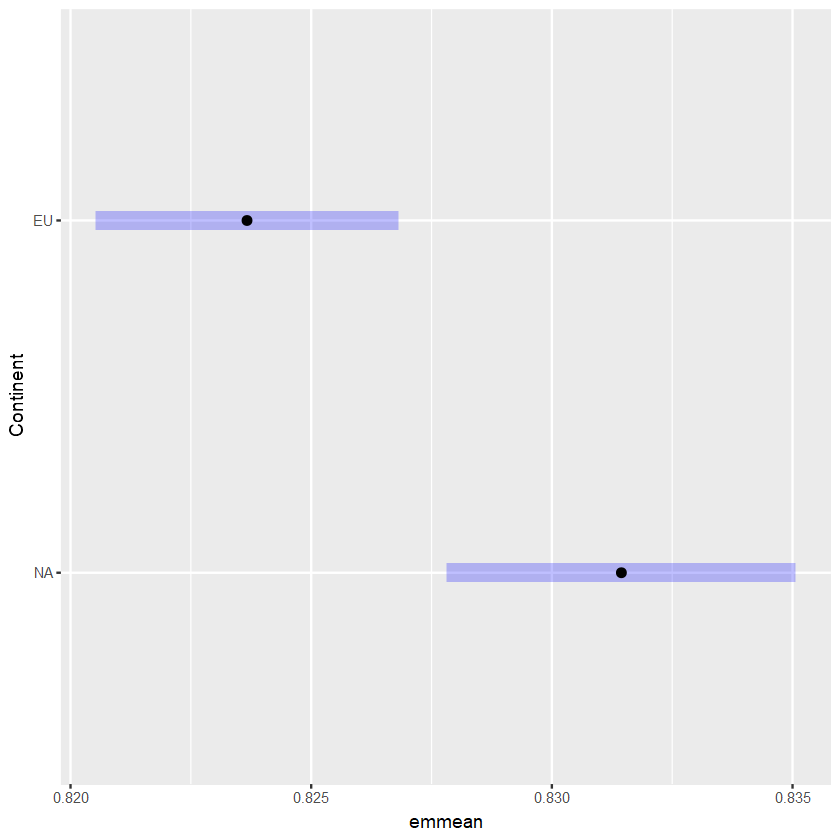

In [13]:
library(car)
library(emmeans) # For calculating marginal means (least-squares means)

# Fit your linear model using lm() function
lm_model <- lm(Ratio ~ Continent, data = ex0918)

# Anova to test the significance of the categorical predictor
anova_result <- Anova(lm_model, type="III")

# Print ANOVA table
print(anova_result)

# Calculate marginal (least-squares) means for each level of the categorical predictor
marginal_means <- emmeans(lm_model, specs = ~ Continent, data = ex0918)

# Print marginal means
print(marginal_means)

# Plot marginal means (if needed)
plot(marginal_means)

# Alternatively, if you're interested in confidence intervals for each level
# Calculate confidence intervals for each level
conf_intervals <- confint(marginal_means)

# Print confidence intervals
print(conf_intervals)

The ANOVA table indicates that the model including the categorical predictor "Continent" is statistically significant (F(1, 19) = 11.525, p = 0.00304), suggesting that there are significant differences in the mean "Ratio" across different continents.

Marginal Means For North America (NA): The estimated mean "Ratio" for observations in North America is 0.8314, with a 95% confidence interval ranging from 0.8278 to 0.8351.
Marginal Means For Europe (EU): The estimated mean "Ratio" for observations in Europe is 0.8237, with a 95% confidence interval ranging from 0.8205 to 0.8268.

Based on the ANOVA results, there is evidence to suggest that the mean "Ratio" differs significantly across continents. Specifically, the mean "Ratio" in North America is higher compared to Europe, as indicated by the marginal means. This suggests that the continent on which the observation is made influences the value of the "Ratio" variable.

In [14]:
# Assuming your linear model is called "lm_model"
# R-squared value
r_squared <- summary(lm_model)$r.squared

# Adjusted R-squared value (if needed)
adjusted_r_squared <- summary(lm_model)$adj.r.squared

# Print R-squared values
print(paste("R-squared:", round(r_squared, 3)))
print(paste("Adjusted R-squared:", round(adjusted_r_squared, 3)))

[1] "R-squared: 0.378"
[1] "Adjusted R-squared: 0.345"


**Interpretation:**

  R-squared: This value indicates that approximately 37.8% of the variance in the dependent variable ("Ratio") is explained by the independent variable(s) in our model.
  
Adjusted R-squared: This value is similar to R-squared but adjusts for the number of predictors in the model. It indicates that approximately 34.5% of the variance in the dependent variable is explained by the independent variable(s) after considering the number of predictors.

An R-squared value of 0.378 suggests that our model explains a moderate amount of the variance in the dependent variable. Theregfore, while our model explains a significant portion of the variance in the dependent variable, there is still room for improvement.

# Úloha 4

Z předchozích dvou bodů máme 2 regresní modely: jeden zkoumá závislost vysvětlované proměnné na numerickém regresoru, druhý na kategoriálním. Naším cílem je nyní tyto dva modely spojit, zjistit jejich parametry a interpretovat je.